In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras import callbacks
from keras.layers import Dense, Dropout, Activation, BatchNormalization, MaxPooling2D, Conv2D

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.1, random_state=0)

In [4]:
print(X_train.shape, "Training Images Shape")
print(y_train.shape, "Training Labels Shape")

print(X_test.shape, "Testing Images Shape")
print(y_test.shape, "Testing Images Shape")

print(X_valid.shape, "Validation Training Shape")
print(y_valid.shape, "Validation Training Shape")

(45000, 32, 32, 3) Training Images Shape
(45000, 1) Training Labels Shape
(10000, 32, 32, 3) Testing Images Shape
(10000, 1) Testing Images Shape
(5000, 32, 32, 3) Validation Training Shape
(5000, 1) Validation Training Shape


[]

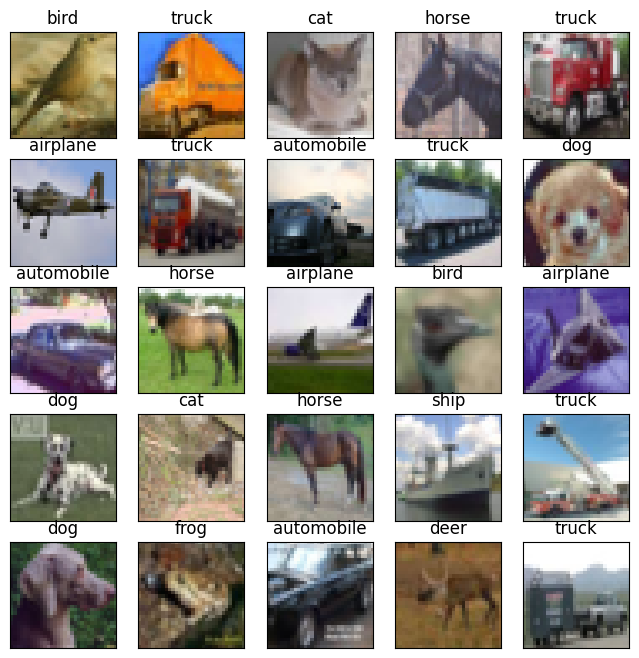

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8, 8))
for i in range(25):
  ax = plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  # ax.grid(False)
  plt.imshow(X_train[i])
  plt.title(class_names[y_train[i][0]])
plt.plot()

In [8]:
import numpy as np

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_valid = X_valid.astype('float32')

mean = np.mean(X_train)
std = np.std(X_train)

# Added 1e-4 to avoid the 0 values
X_train = (X_train-mean)/(std+1e-4)
X_test = (X_test-mean)/(std+1e-4)
X_valid = (X_valid-mean)/(std+1e-4)

In [9]:
import numpy as np
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_valid = to_categorical(y_valid, 10)

In [10]:
# Data Augmentation

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.12,
    height_shift_range=0.12,
    horizontal_flip=True,
    zoom_range=0.1,
    brightness_range=[0.9, 1.1],
    shear_range=10,
    channel_shift_range=0.1
)

# Fit generator if using featurewise stats

datagen.fit(X_train)

In [11]:
# Model

weight_decay = 1e-4

model = Sequential([

    layers.Input(shape=X_train.shape[1:]),

    layers.Conv2D(32, (3,3), padding='same', activation='relu',
                  kernel_regularizer=l2(weight_decay)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), padding='same', activation='relu',
                  kernel_regularizer=l2(weight_decay)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3,3), padding='same', activation='relu',
                  kernel_regularizer=l2(weight_decay)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu',
                  kernel_regularizer=l2(weight_decay)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3,3), padding='same', activation='relu',
                  kernel_regularizer=l2(weight_decay)),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu',
                  kernel_regularizer=l2(weight_decay)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),
    layers.Dropout(0.4),

    layers.Conv2D(256, (3,3), padding='same', activation='relu',
                  kernel_regularizer=l2(weight_decay)),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3,3), padding='same', activation='relu',
                  kernel_regularizer=l2(weight_decay)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(10)  # logits
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,186,346 (4.53 MB)

 Trainable params: 1,184,426 (4.52 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [12]:
# Compile

opt = tf.keras.optimizers.Adam(learning_rate=5e-4)

model.compile(
    optimizer=opt,
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [13]:
# Callbacks

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

lr_chk = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    patience=3,
    factor=0.1,
    min_lr=1e-4
)


In [14]:
# Training (WITH augmentation)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=60,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping, lr_chk]
)


Epoch 1/60


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 45ms/step - accuracy: 0.2734 - loss: 2.8955 - val_accuracy: 0.4738 - val_loss: 1.5997 - learning_rate: 5.0000e-04
Epoch 2/60
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 38ms/step - accuracy: 0.4601 - loss: 1.7263 - val_accuracy: 0.5442 - val_loss: 1.4437 - learning_rate: 5.0000e-04
Epoch 3/60
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.5453 - loss: 1.4312 - val_accuracy: 0.6052 - val_loss: 1.2848 - learning_rate: 5.0000e-04
Epoch 4/60
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.6057 - loss: 1.2417 - val_accuracy: 0.6624 - val_loss: 1.1243 - learning_rate: 5.0000e-04
Epoch 5/60
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.6528 - loss: 1.1323 - val_accuracy: 0.7026 - val_loss: 1.0086 - learning_rate: 5.0000e-04
Epoch 6/60
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.6788 - loss: 1.0760 - val_accuracy: 0.7166 - val_loss: 0.9509 - learning_rate: 5.0000e-04
Epoch 7/60
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/

Text(0, 0.5, 'Epochs')

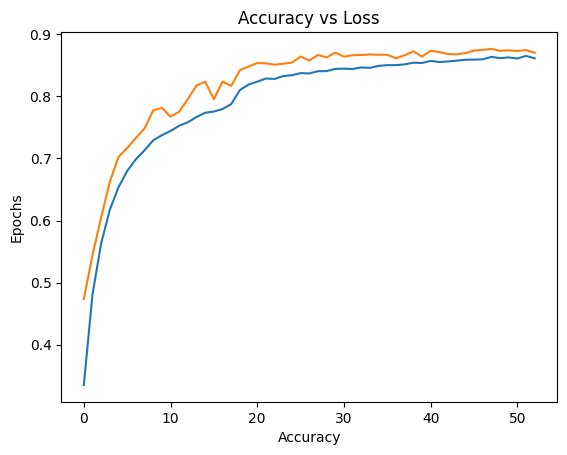

In [17]:
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title("Accuracy vs Loss")
plt.xlabel("Accuracy")
plt.ylabel("Epochs")


Text(0, 0.5, 'Epochs')

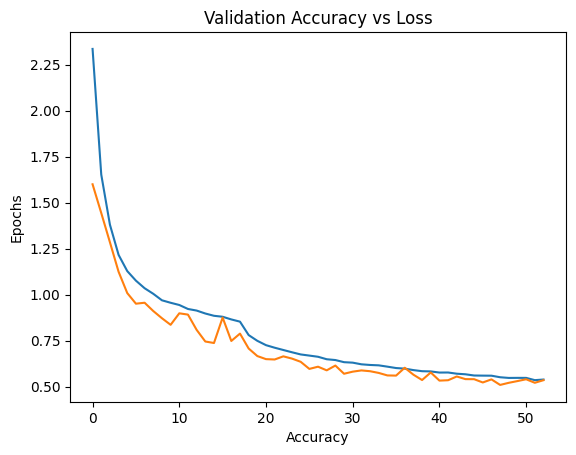

In [19]:
plt.plot(history.history['loss'], label = 'Validation Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title("Validation Accuracy vs Loss")
plt.xlabel("Accuracy")
plt.ylabel("Epochs")

In [21]:
model_evaluation = model.evaluate(X_test, y_test)
print(model_evaluation)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8838 - loss: 0.5110
[0.5177102088928223, 0.878600001335144]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<Axes: >

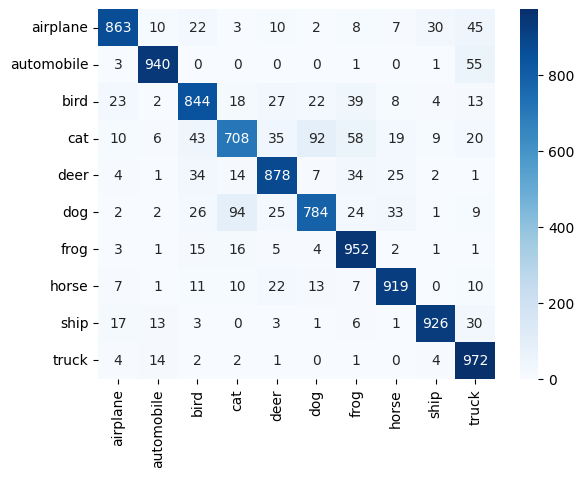

In [23]:
from keras.src.metrics.iou_metrics import confusion_matrix
# Confusion Matrix
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
con_mat = tf.math.confusion_matrix(np.argmax(y_test, axis = 1), predicted_labels)
# print(con_mat)
sns.heatmap(con_mat, xticklabels = class_names, yticklabels = class_names, annot = True, cmap = 'Blues', fmt = 'g')

In [30]:
import urllib.request
import cv2
import numpy as np

# Fetch the raw image from GitHub
url = "https://raw.githubusercontent.com/FarzadNekouee/Keras-CIFAR10-CNN-Model/master/truck_sample.png"
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


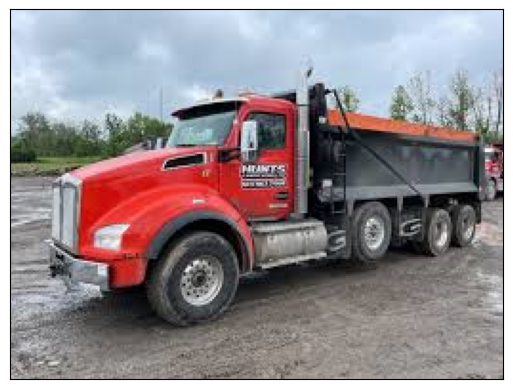

In [31]:
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [32]:
# Resize it to 32x32 pixels
image = cv2.resize(image, (32,32))

# Normalize the image
image = (image-mean)/(std+1e-7)

# Add an extra dimension because the model expects a batch of images
image = image.reshape((1, 32, 32, 3))


In [34]:
prediction = model.predict(image)
predicted_class = prediction.argmax()

print('Predicted class: ', class_names[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 952ms/step
Predicted class:  truck
